# Models and policy

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
  - 1.1. [Tests](#toc1_1_)    
- 2. [Transition path](#toc2_)    
- 3. [Simulation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebook shows how to **solve a Heterogenous Agent New Keynessian (HANK) model with a search-and-match labor markt** using the ``GEModelTools`` package.

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import scipy.optimize as optimize

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANKSAMModel import HANKSAMModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANKSAMModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path

In [4]:
model.info()

settings:
 par.py_hh = False
 par.py_block = True
 par.full_z_trans = True
 par.T = 300

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [w,RealR_ex_post,tau]
 inputs_hh_z: [delta,lambda_u]
 outputs_hh: [a,c,s]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: [shock_TFP,delta,w]
 unknowns: [px,Vj,vt,ut,S,Pi]
 targets: [errors_Vj,errors_ut,errors_entry,errors_Pi,errors_assets,errors_search]

blocks (inputs -> outputs):
 production: [shock_TFP,delta,w,px,Vj] -> [errors_Vj]
 labor_market: [vt,ut,S,delta] -> [theta,lambda_v,lambda_u,v,u,entry,errors_ut]
 entry: [lambda_v,Vj] -> [errors_entry]
 price_setters: [shock_TFP,u,px,Pi] -> [errors_Pi]
 central_bank: [Pi] -> [R,RealR,q]
 government: [w,u,q] -> [tau,B,qB,UI,Yt_hh]
 mutual_fund: [shock_TFP,u,w,q,RealR] -> [div,p_eq,RealR_ex_post]
 hh: [RealR_ex_post,delta,lambda_u,tau,w] -> [A_hh,C_hh,S_hh]
 market_clearing: [qB,S,A_hh,S_hh,p_eq,div,C_hh,shock_TFP,u] -> [errors_assets,errors_search,G,clearing_Y]


In [5]:
#model.draw_DAG(figsize=(15,15),node_size=15000,order=['shocks','unknowns','blocks'])

In [6]:
par.mutual_fund_share = 1.0

In [7]:
model.find_ss(do_print=True)

par.A = 0.3680
par.kappa = 0.5356
ss.w = 0.9215
ss.delta = 0.0250
ss.lambda_u = 0.3000
ss.lambda_v = 0.5000
ss.theta = 0.6000
ss.u = 0.0551
ss.ut = 0.0787
ss.S = 0.0787
household problem in ss solved in 6.2 secs [3667 iterations]
household problem in ss simulated in 4.5 secs [2656 iterations]
ss.A_hh =4.972284315697765
par.PIH_share =0.39323902238139935
household problem in ss solved in 2.5 secs [3667 iterations]
household problem in ss simulated in 0.4 secs [2696 iterations]
ss.A_hh =5.412543119211064
steady state found in 14.3 secs


### 1.1. <a id='toc1_1_'></a>[Tests](#toc0_)

In [8]:
model.test_path()

shocks: shock_TFP delta w 
unknowns: px Vj vt ut S Pi 

blocks.production
 errors_Vj        0.0e+00 [target]
blocks.labor_market
 theta            0.0e+00
 lambda_v         0.0e+00
 lambda_u         0.0e+00
 v                0.0e+00
 u                0.0e+00
 entry            0.0e+00
 errors_ut        0.0e+00 [target]
blocks.entry
 errors_entry     0.0e+00 [target]
blocks.price_setters
 errors_Pi        0.0e+00 [target]
blocks.central_bank
 R                0.0e+00
 RealR            0.0e+00
 q                0.0e+00
blocks.government
 tau              0.0e+00
 B                0.0e+00
 qB               1.1e-16
 UI               0.0e+00
 Yt_hh            0.0e+00
blocks.mutual_fund
 div              0.0e+00
 p_eq             0.0e+00
 RealR_ex_post    8.0e-10
hh
 A_hh             1.2e-08
 C_hh             9.9e-11
 S_hh             8.2e-16
blocks.market_clearing
 errors_assets    1.6e-08 [target]
 errors_search    6.0e-15 [target]
 G                0.0e+00
 clearing_Y       6.7e-02


## 2. <a id='toc2_'></a>[Transition path](#toc0_)

In [9]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for RealR_ex_post   in 0.4 secs
curly_Y and curly_D calculated for delta           in 0.4 secs
curly_Y and curly_D calculated for lambda_u        in 0.4 secs
curly_Y and curly_D calculated for tau             in 0.4 secs
curly_Y and curly_D calculated for w               in 0.3 secs
curly_E calculated in 2.2 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 4.2 secs

full Jacobians:
full Jacobian to unknowns computed in 0.9 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_blocks(): 0.2 secs]


In [10]:
model.find_transition_path(shocks=['shock_TFP'])

px: terminal value is   0.95031478, but ss value is   0.95000000
Vj: terminal value is   1.07143585, but ss value is   1.07112106
vt: terminal value is   0.04726024, but ss value is   0.04724409
ut: terminal value is   0.07872970, but ss value is   0.07874016
S: terminal value is   0.07872851, but ss value is   0.07874016
theta: terminal value is   0.60029391, but ss value is   0.60000000
lambda_v: terminal value is   0.49985310, but ss value is   0.50000000
lambda_u: terminal value is   0.30005877, but ss value is   0.30000000
v: terminal value is   0.02363706, but ss value is   0.02362205
u: terminal value is   0.05510616, but ss value is   0.05511811
entry: terminal value is   0.02421573, but ss value is   0.02421260
Pi: terminal value is   1.00001049, but ss value is   1.00000000
R: terminal value is   1.00166735, but ss value is   1.00165158
RealR: terminal value is   1.00166735, but ss value is   1.00165158
q: terminal value is  54.58951440, but ss value is  54.59037358
tau: term

In [11]:
model.find_IRFs(shocks=['shock_TFP'])

### shocks ###


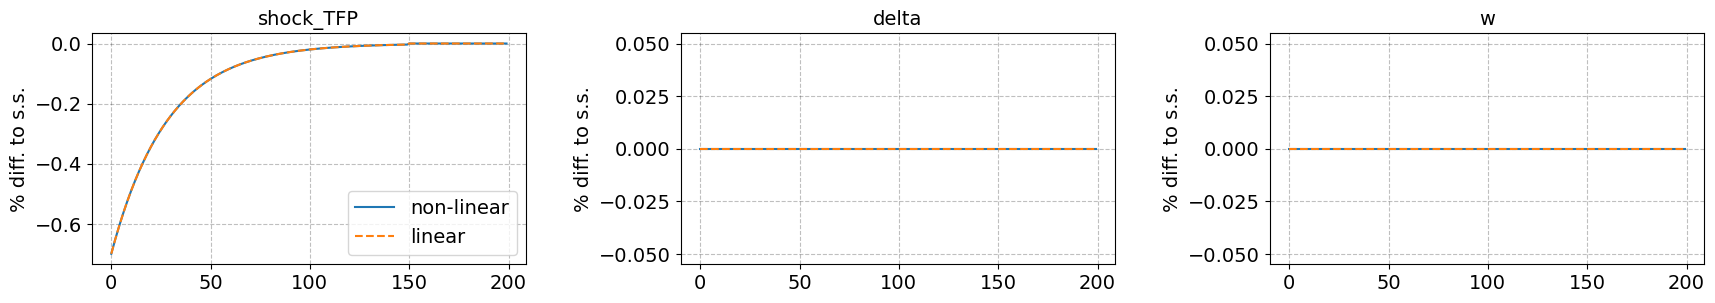


### varnames ###


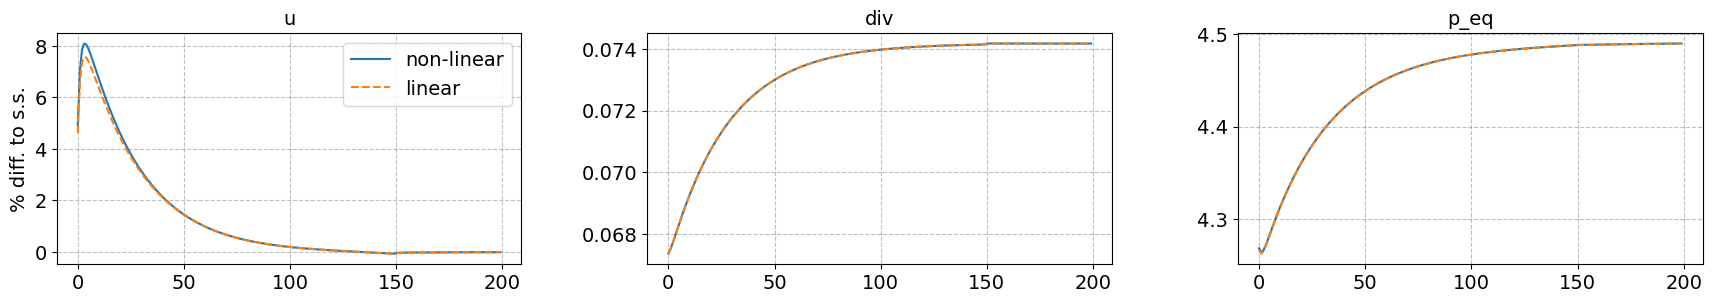


### tagets ###


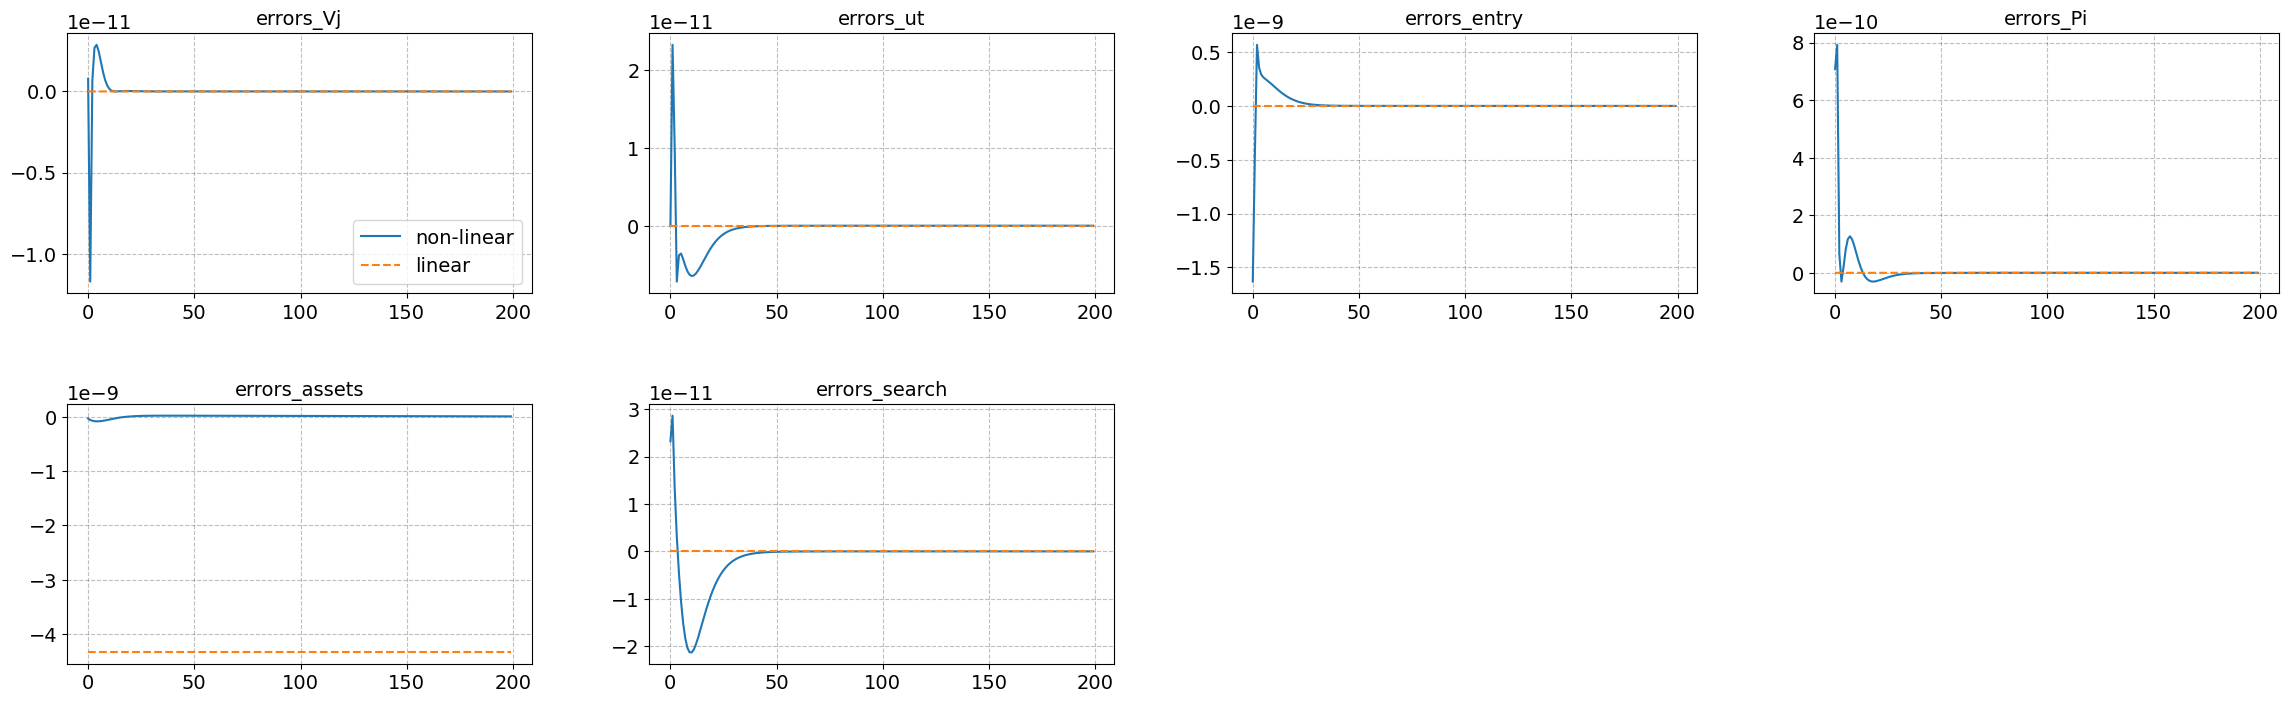

In [12]:
model.show_IRFs(['u','div','p_eq'],lvl_value=['div','p_eq'],T_max=200,do_linear=True)

In [13]:
model_flex = model.copy()
model_flex.par.phi = 0.001
model_flex.compute_jacs()
model_flex.find_transition_path(shocks=['shock_TFP'])

Pi: terminal value is   1.00011841, but ss value is   1.00000000
R: terminal value is   1.00182950, but ss value is   1.00165158
RealR: terminal value is   1.00182950, but ss value is   1.00165158
q: terminal value is  54.58067876, but ss value is  54.59037358
tau: terminal value is   0.01609956, but ss value is   0.01609652
qB: terminal value is   0.92133938, but ss value is   0.92150000
p_eq: terminal value is   4.49024554, but ss value is   4.49104311
A_hh: terminal value is   5.41158492, but ss value is   5.41254312
clearing_Y: terminal value is  -0.07417323, but ss value is  -0.00741732


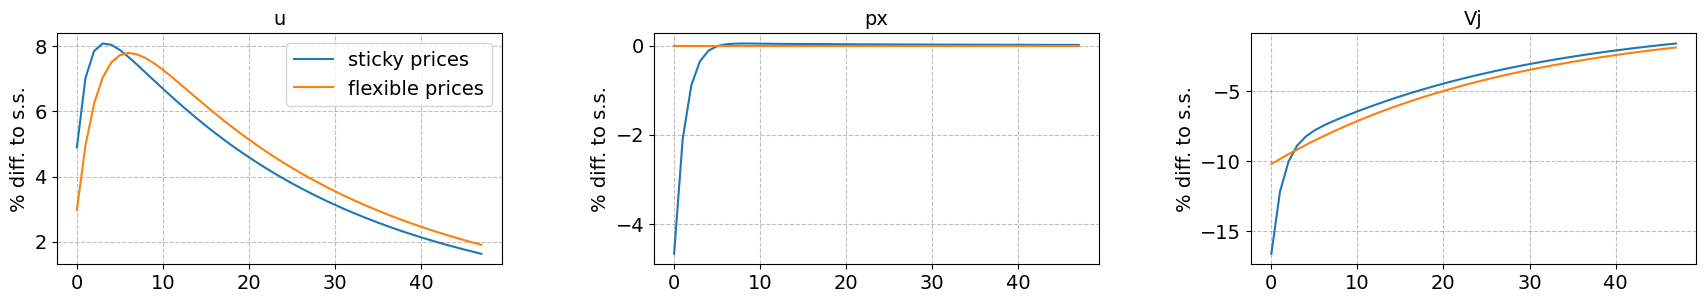

In [14]:
model.compare_IRFs([model,model_flex],['sticky prices','flexible prices'],['u','px','Vj'],do_shocks=False,do_targets=False,T_max=48)

## 3. <a id='toc3_'></a>[Simulation](#toc0_)

In [15]:
sim = model.sim

In [16]:
np.random.seed(1917)
try:
    model.simulate(do_print=True)
except Exception as e:
    print(e) 

simulation prepared in 8.0 secs [solution matrix: 0.3 secs, households: 7.7 secs]
aggregates simulated in 0.9 secs
household policies simulated in 8.3 secs
timing varying z_trans not implemented


In [17]:
def model_sim():
    
    fig = plt.figure(figsize=(12,4),dpi=100)

    ax = fig.add_subplot(1,2,1)
    ax.set_title('TFP')
    ax.plot(ss.shock_TFP+sim.dshock_TFP,ls='--',)
    ax.axhline(ss.shock_TFP,color='black',zorder=0)
    
    ax = fig.add_subplot(1,2,2)
    ax.set_title('unemployment')
    ax.plot(ss.u+sim.du,ls='--',)
    ax.axhline(ss.u,color='black',zorder=0)
    

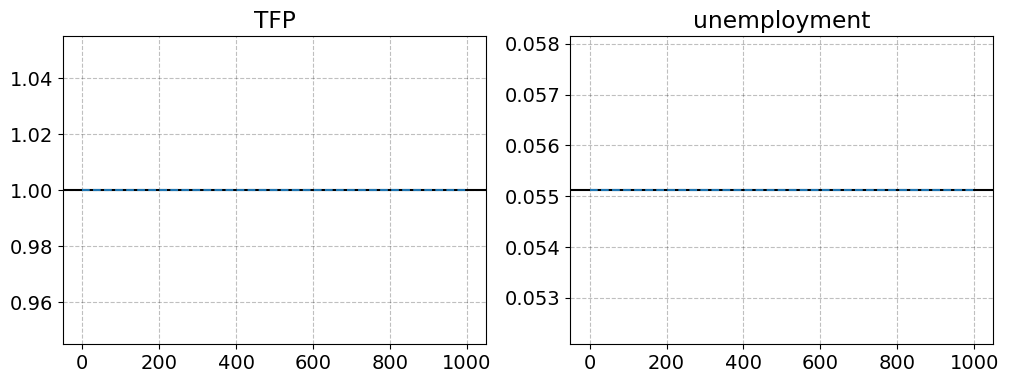

In [18]:
model_sim()